In [2]:
pip install matplotlib numpy pandas openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 112.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 143.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 102.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Replace this:
# df = pd.read_csv(filename, parse_dates=['UTC'], index_col='UTC')

# WITH THIS (adjust the format string if your CSV is different):
df = pd.read_csv(
    filename,
    parse_dates=['UTC'],
    index_col='UTC',
    date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S')
)

print(df.index)
print(df.head())


NameError: name 'filename' is not defined

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- CONFIGURATION ---
beaches = ['Maroubra', 'Narrabeen-Mid', 'Tamarama',] # Add other beaches as needed, e.g. 'Narrabeen-Mid', etc.
contours = ['10', '30']
plot_start = pd.to_datetime('2019-05-30')
plot_end = pd.to_datetime('2019-06-27')
storm_start = pd.to_datetime('2019-06-04')
storm_end = pd.to_datetime('2019-06-07')

def load_wave_data(beach, contour):
    fname = f'WaveTimeSeries_{beach}_30May-27Jun2019_{contour}-metre-contour.csv'
    df = pd.read_csv(fname, parse_dates=['UTC'], index_col='UTC')
    
    # Standardize column names
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    
    # Filter to just the plot window
    df = df[(df.index >= plot_start) & (df.index <= plot_end)]

    return df
    
    data = {}
    for beach in beaches:
        data[beach] = {}
    for contour in contours:
        try:

            data[beach][contour] = load_wave_data(beach, contour)
        except Exception as e:
            print(f'Error loading {beach} {contour}m: {e}')
    
    for beach in beaches:
        if not all(contour in data[beach] and data[beach][contour] is not None for contour in contours):
            continue
    
    fig, axes = plt.subplots(2, 1, figsize=(15, 5), sharex=True, constrained_layout=True)
    
    # --- Wave Height ---
    for contour, color in zip(contours, ['royalblue', 'darkorange']):
        label = f'{contour}m'
    data[beach][contour]['significant_wave_height'].plot(
    ax=axes[0], label=label, color=color, linewidth=2)
    axes[0].set_ylabel('Significant wave height (m)')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    axes[0].axvspan(storm_start, storm_end, color='red', alpha=0.2)
    axes[0].set_title(f'{beach} significant wave height (10m vs 30m contour)', fontsize=14, pad=10)
    
    # --- Wave Period ---
    for contour, color in zip(contours, ['royalblue', 'darkorange']):
        label = f'{contour}m'
    data[beach][contour]['peak_wave_period'].plot(
    ax=axes[1], label=label, color=color, linewidth=2)
    axes[1].set_ylabel('Significant wave period (s)')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    axes[1].axvspan(storm_start, storm_end, color='red', alpha=0.2)
    axes[1].set_title(f'{beach} significant wave period (10m vs 30m contour)' , fontsize=14, pad=10)
    
    # --- Figure Title ---
    fig.suptitle(f'', fontsize=16, y=1.03)
    
    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- CONFIGURATION ---
beaches = ['Maroubra', 'Narrabeen-Mid', 'Tamarama']  # Add other beaches as needed
contours = ['10', '30']
plot_start = pd.to_datetime('2019-05-30')
plot_end = pd.to_datetime('2019-06-27')
storm_start = pd.to_datetime('2019-06-04')
storm_end = pd.to_datetime('2019-06-07')

def load_wave_data(beach, contour):
    fname = f'WaveTimeSeries_{beach}_30May-27Jun2019_{contour}-metre-contour.csv'
    df = pd.read_csv(fname, parse_dates=['UTC'], index_col='UTC')
    # Standardize column names
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    # Filter to just the plot window
    df = df[(df.index >= plot_start) & (df.index <= plot_end)]
    return df

# --- DATA LOADING ---
data = {}
for beach in beaches:
    data[beach] = {}
    for contour in contours:
        try:
            data[beach][contour] = load_wave_data(beach, contour)
        except Exception as e:
            print(f'Error loading {beach} {contour}m: {e}')

# --- PLOTTING ---
for beach in beaches:
    if not all(contour in data[beach] and data[beach][contour] is not None for contour in contours):
        continue

    fig, axes = plt.subplots(2, 1, figsize=(15, 6), sharex=True, constrained_layout=True)

    # --- Wave Height ---
    for contour, color in zip(contours, ['royalblue', 'darkorange']):
        label = f'{contour}m'
        data[beach][contour]['significant_wave_height'].plot(
            ax=axes[0], label=label, color=color, linewidth=2)
    axes[0].set_ylabel('Significant wave height (m)')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    axes[0].axvspan(storm_start, storm_end, color='red', alpha=0.2)
    axes[1].set_title(f'{beach} significant wave height (10m vs 30m contour)' , fontsize=14, pad=10)
                  
    # --- Wave Period ---
    for contour, color in zip(contours, ['royalblue', 'darkorange']):
        label = f'{contour}m'
        data[beach][contour]['peak_wave_period'].plot(
            ax=axes[1], label=label, color=color, linewidth=2)
    axes[1].set_ylabel('Significant wave period (s)')
    axes[1].set_title(f'{beach} significant wave period (10m vs 30m contour)' , fontsize=14, pad=10)
    
    

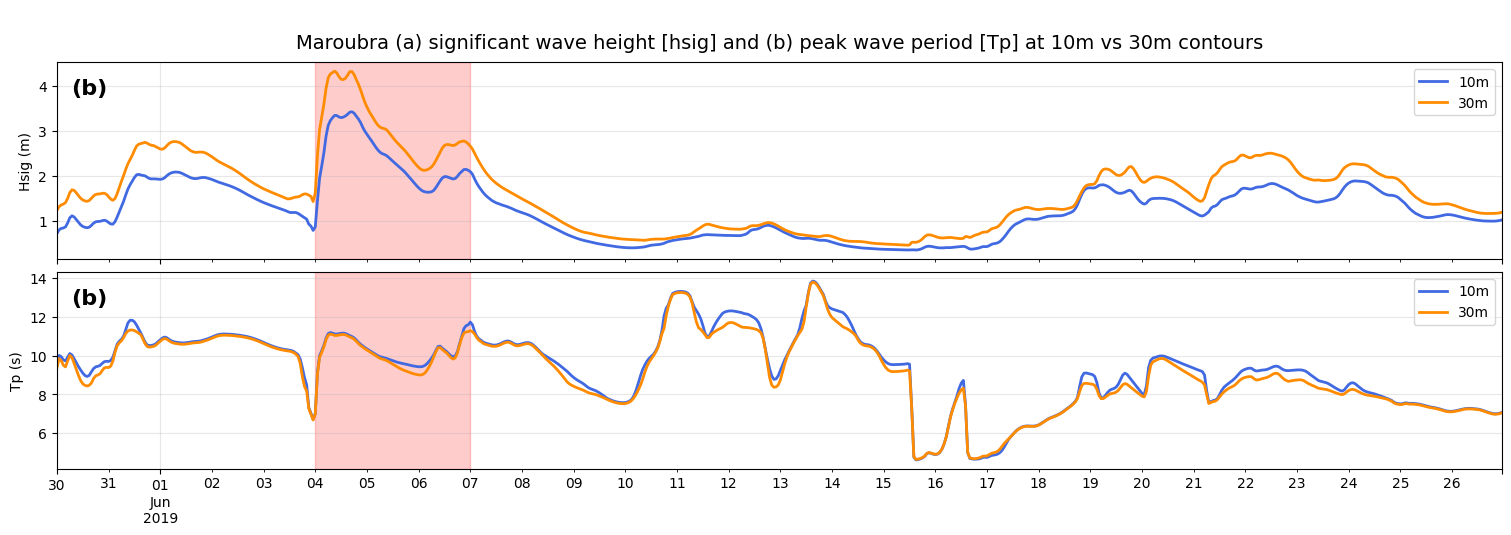

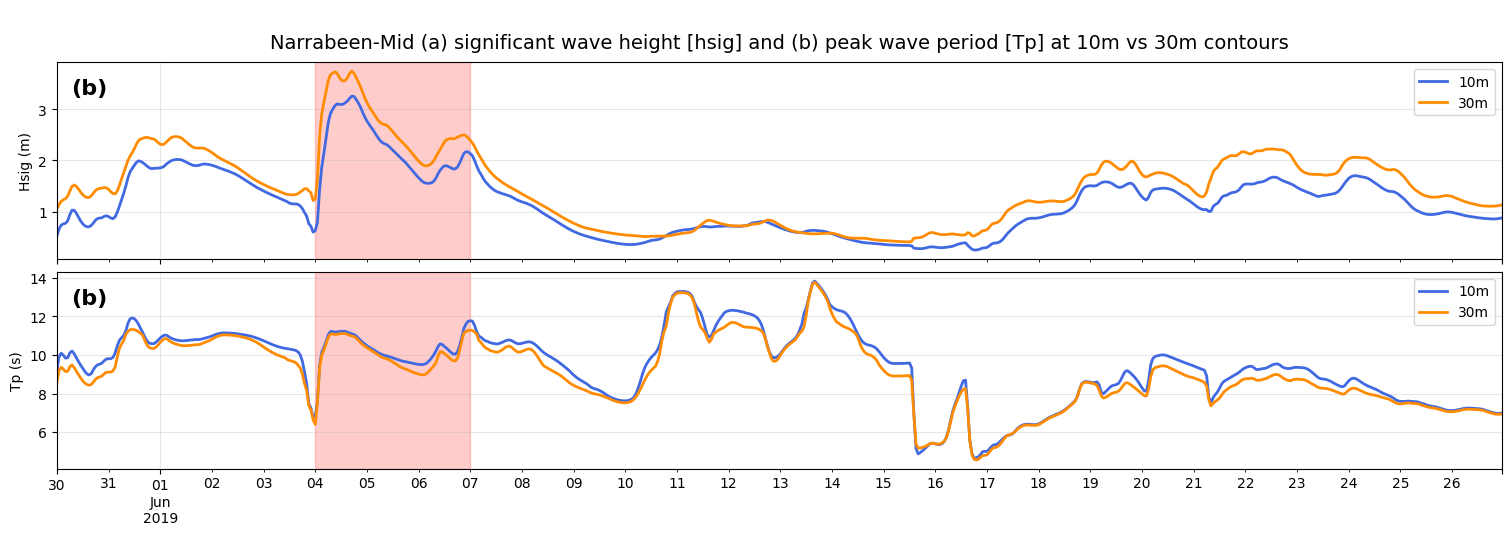

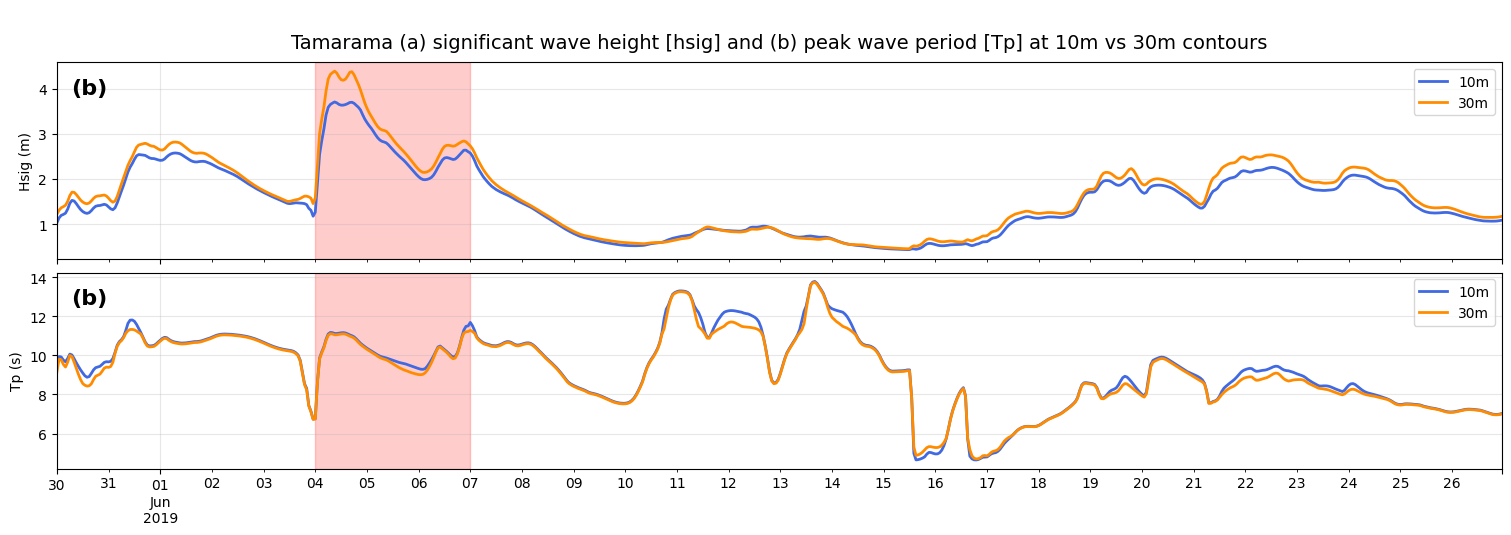

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- CONFIGURATION ---
beaches = ['Maroubra', 'Narrabeen-Mid', 'Tamarama']
contours = ['10', '30']
plot_start = pd.to_datetime('2019-05-30')
plot_end = pd.to_datetime('2019-06-27')
storm_start = pd.to_datetime('2019-06-04')
storm_end = pd.to_datetime('2019-06-07')

def load_wave_data(beach, contour):
    fname = f'WaveTimeSeries_{beach}_30May-27Jun2019_{contour}-metre-contour.csv'
    df = pd.read_csv(fname, parse_dates=['UTC'], index_col='UTC')
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    df = df[(df.index >= plot_start) & (df.index <= plot_end)]
    return df

# --- DATA LOADING ---
data = {}
for beach in beaches:
    data[beach] = {}
    for contour in contours:
        try:
            data[beach][contour] = load_wave_data(beach, contour)
        except Exception as e:
            print(f'Error loading {beach} {contour}m: {e}')

panel_labels = ['a', 'b']


# --- PLOTTING ---
for beach in beaches:
    if not all(contour in data[beach] and data[beach][contour] is not None for contour in contours):
        continue

    fig, axes = plt.subplots(2, 1, figsize=(15, 5), sharex=True, constrained_layout=True)

    # --- Wave Height ---
    for contour, color in zip(contours, ['royalblue', 'darkorange']):
        label = f'{contour}m'
        data[beach][contour]['significant_wave_height'].plot(
            ax=axes[0], label=label, color=color, linewidth=2)
    axes[0].set_ylabel('Hsig (m)')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    axes[0].axvspan(storm_start, storm_end, color='red', alpha=0.2)
    # Panel label and title
    axes[0].text(0.01, 0.92, f'({panel_labels[1]})', transform=axes[0].transAxes, fontsize=16, fontweight='bold', va='top')
    axes[0].set_title(f'{beach} (a) significant wave height [hsig] and (b) peak wave period [Tp] at 10m vs 30m contours', fontsize=14, pad=10)

    # --- Wave Period ---
    for contour, color in zip(contours, ['royalblue', 'darkorange']):
        label = f'{contour}m'
        data[beach][contour]['peak_wave_period'].plot(
            ax=axes[1], label=label, color=color, linewidth=2)
    axes[1].set_ylabel('Tp (s)')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    axes[1].axvspan(storm_start, storm_end, color='red', alpha=0.2)
    axes[1].text(0.01, 0.92, f'({panel_labels[1]})', transform=axes[1].transAxes, fontsize=16, fontweight='bold', va='top')
    axes[1].set_xlabel('')  # Remove 'UTC' label

    # --- Figure Title ---
    fig.suptitle(f' ', fontsize=16, y=1.04)
    plt.show()


In [ ]:
# Using your 30m contour data
def calculate_wave_power(H, T):
    rho = 1025  # kg/m³
    g = 9.81    # m/s²
    return 0.5 * rho * g**2 * H**2 * T / (64*np.pi)

# Add wave power to your dataset
data['Maroubra']['30']['Wave Power'] = calculate_wave_power(
    data['Maroubra']['30']['Significant Wave Height'],
    data['Maroubra']['30']['Peak Wave Period']
)

# Plot with depth contours
fig, ax = plt.subplots()
depth_contours = np.arange(-30, 0, 5)
cp = ax.tricontour(data['Maroubra']['30'].index, 
                  data['Maroubra']['30']['Wave Power'], 
                  data['Maroubra']['30']['Depth'], 
                  levels=depth_contours, colors='gray')
ax.plot(data['Maroubra']['30']['Wave Power'], 'r-', label='Wave Power')
ax.clabel(cp, inline=True, fontsize=10)
ax.set_ylabel('Wave Power (kW/m)')
ax.legend()
plt.title('Wave Power vs. Depth at 30m Contour')
plt.show()
